In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import os


In [2]:
#writing my file directory(path...don't copy paste instead write the path by your own)
#my_example_nc_file = '/scratch/mkibria/data/EIN75/pr/v20190502/pr_WAS-22_ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-7_v0_mon_197901-198012.nc
#fh = Dataset(my_example_nc_file) #defining my file's dataset.please notice the capital leters or small leters used in it.
#print(fh)
 

In [3]:
ds1 = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/pr_WAS-22_ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-7_v0_mon_197901-198012.nc')
ds2 = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/pr_WAS-22_ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-7_v0_mon_198101-199012.nc')
ds3 = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/pr_WAS-22_ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-7_v0_mon_199101-200012.nc')
ds4 = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/pr_WAS-22_ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-7_v0_mon_201101-201711.nc')


data = xr.merge([ds1,ds2,ds3,ds4])

data

<xarray.Dataset>
Dimensions:    (time: 347, y: 337, x: 429, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2017-11-16
    lat        (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
    lon        (y, x) float64 27.41 27.61 27.81 28.01 ... 126.1 126.3 126.6
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    crs        |S1 b''
    pr         (time, y, x) float32 0.0001351 0.0001187 ... 7.185e-06 8.965e-06
    time_bnds  (time, bnds) datetime64[ns] 1979-01-01 1979-02-01 ... 2017-12-01
Attributes: (12/163)
    project_id:                                      CORDEX
    ipcc_scenario_code:                              EVALUATION
    institute_id:                                    ICTP
    note:                                            The domain is larger tha...
    comment:                                         RegCM CORDEX India25 run
    experiment:                                      WAS-22
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    Conventions:                                     CF-1.7

In [4]:
#data.variables 

In [5]:
#for var in data.variables.values():
 #   print(var)

In [6]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 311, y: 337, x: 429, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2015-11-16
    lat        (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
    lon        (y, x) float64 27.41 27.61 27.81 28.01 ... 126.1 126.3 126.6
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    crs        |S1 b''
    pr         (time, y, x) float32 0.0001357 0.0001198 ... 1.013e-05 1.051e-05
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
Attributes: (12/163)
    project_id:                                      CORDEX
    ipcc_scenario_code:                              EVALUATION
    institute_id:                                    ICTP
    note:                                            The domain is larger tha...
    comment:                                         RegCM CORDEX India25 run
    experiment:                                      WAS-22
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    Conventions:                                     CF-1.7

In [7]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 104, y: 337, x: 429, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1980-06-16 ... 2015-09-16
    lat        (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
    lon        (y, x) float64 27.41 27.61 27.81 28.01 ... 126.1 126.3 126.6
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    crs        |S1 b''
    pr         (time, y, x) float32 2.938e-07 1.874e-07 ... 5.099e-05 6.797e-05
    time_bnds  (time, bnds) datetime64[ns] 1980-06-01 1980-07-01 ... 2015-10-01
Attributes: (12/163)
    project_id:                                      CORDEX
    ipcc_scenario_code:                              EVALUATION
    institute_id:                                    ICTP
    note:                                            The domain is larger tha...
    comment:                                         RegCM CORDEX India25 run
    experiment:                                      WAS-22
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    Conventions:                                     CF-1.7

In [8]:
#data["pr"]["x"][379:429].values
#data["pr"]["y"][237:337].values
#data["pr"]["time"].values
#jjas_data["pr"]["lat"][:].values

#jjas_data["pr"]["lon"][:].values


#data["pr"]["x"].values

#data.x

In [9]:
#data["pr"]["y"][287:337].values

In [10]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(4125000.,5350000.),y=slice(2975000.,4200000.))
#jjas_data

In [11]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean 

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[9.14451539e-06, 8.41396650e-06, 8.44882561e-06, ...,
        1.83427619e-05, 1.84346609e-05, 1.98054804e-05],
       [9.00379018e-06, 7.67915117e-06, 7.57163389e-06, ...,
        1.40538468e-05, 1.43833640e-05, 1.77034108e-05],
       [8.58770909e-06, 7.00299324e-06, 6.23392634e-06, ...,
        1.20466193e-05, 1.34147931e-05, 1.69528575e-05],
       ...,
       [3.62160936e-05, 3.12137927e-05, 2.76698338e-05, ...,
        9.38525845e-05, 1.15291783e-04, 1.80235045e-04],
       [4.72922511e-05, 3.53035211e-05, 3.15991019e-05, ...,
        1.00055491e-04, 1.10289126e-04, 1.66862286e-04],
       [5.40441870e-05, 4.33200257e-05, 3.67193315e-05, ...,
        1.21016048e-04, 1.27115374e-04, 1.64337325e-04]], dtype=float32)
Coordinates:
    lat      (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
    lon      (y, x) float64 27.41 27.61 27.81 28.01 ... 125.8 126.1 126.3 126.6
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

The pr is given in kg m $^{-2}$  s $^{-1}$ so we have to convert it into mm/day.

The formula is 1 kgm$^{-2}$ s$^{-1}$  = 86400 mm/day. 

so we have to divide pr value by 86400

 

In [12]:
pr_mm = jjas_mean*86400
pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[ 0.79008613,  0.72696671,  0.72997853, ...,  1.58481463,
         1.5927547 ,  1.71119351],
       [ 0.77792747,  0.66347866,  0.65418917, ...,  1.21425237,
         1.24272265,  1.52957469],
       [ 0.74197807,  0.60505862,  0.53861124, ...,  1.04082791,
         1.15903812,  1.46472689],
       ...,
       [ 3.12907049,  2.69687169,  2.39067364, ...,  8.1088633 ,
         9.96121005, 15.57230791],
       [ 4.0860505 ,  3.05022423,  2.73016241, ...,  8.64479444,
         9.52898045, 14.41690153],
       [ 4.66941776,  3.74285022,  3.17255025, ..., 10.45578655,
        10.98276833, 14.1987449 ]])
Coordinates:
    lat      (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
    lon      (y, x) float64 27.41 27.61 27.81 28.01 ... 125.8 126.1 126.3 126.6
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

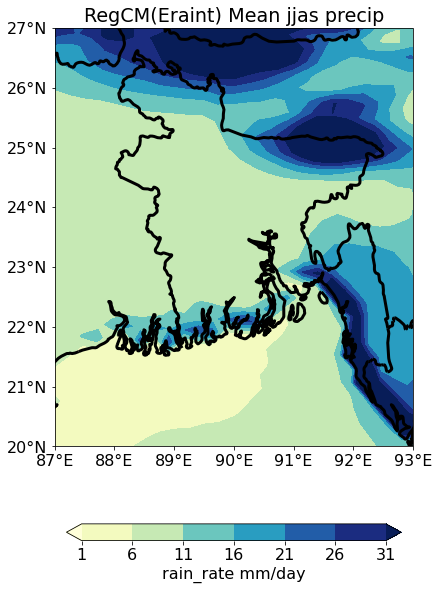

In [17]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'



fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 levels=np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
#ax.add_feature(cfeature.STATES)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.LAKES)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.RIVERS)



plt.title('RegCM(Eraint) Mean jjas precip')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_eraintrin_jjas_mean.png")







Now I will plot the annual precipitation rate in mm/day

In [14]:
annual_mean = data.pr.mean('time')
annual_mean

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[5.4161756e-05, 4.9084447e-05, 4.8255144e-05, ..., 1.0167437e-05,
        1.0016305e-05, 1.0678718e-05],
       [5.2053361e-05, 4.3426902e-05, 4.3355616e-05, ..., 7.8081302e-06,
        7.7864015e-06, 9.5405576e-06],
       [5.4671265e-05, 4.4377957e-05, 3.8774742e-05, ..., 6.6238213e-06,
        7.2535263e-06, 9.2299288e-06],
       ...,
       [4.7432350e-05, 3.7998987e-05, 3.2038013e-05, ..., 3.6578447e-05,
        4.4482298e-05, 6.7620844e-05],
       [5.3989406e-05, 3.9693434e-05, 3.5856956e-05, ..., 3.9114337e-05,
        4.3010346e-05, 6.3377382e-05],
       [5.5924502e-05, 4.5031979e-05, 3.9389637e-05, ..., 4.6627083e-05,
        4.9225680e-05, 6.2891348e-05]], dtype=float32)
Coordinates:
    lat      (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
    lon      (y, x) float64 27.41 27.61 27.81 28.01 ... 125.8 126.1 126.3 126.6
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

In [15]:
#converting from kgm-2s-2 to mm/day

annual_pr_mm = annual_mean*86400
annual_pr_mm

<xarray.DataArray 'pr' (y: 337, x: 429)>
array([[4.67957568, 4.2408962 , 4.16924445, ..., 0.87846654, 0.86540877,
        0.92264127],
       [4.49741042, 3.75208436, 3.74592523, ..., 0.67462245, 0.67274509,
        0.82430418],
       [4.72359733, 3.83425551, 3.35013773, ..., 0.57229816, 0.62670467,
        0.79746585],
       ...,
       [4.09815501, 3.28311247, 2.76808434, ..., 3.16037784, 3.84327056,
        5.8424409 ],
       [4.6646847 , 3.42951268, 3.09804099, ..., 3.37947869, 3.71609393,
        5.47580577],
       [4.83187695, 3.89076294, 3.40326465, ..., 4.02857998, 4.25309879,
        5.43381243]])
Coordinates:
    lat      (y, x) float64 -26.13 -26.1 -26.06 -26.03 ... 43.37 43.33 43.28
    lon      (y, x) float64 27.41 27.61 27.81 28.01 ... 125.8 126.1 126.3 126.6
  * x        (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y        (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06

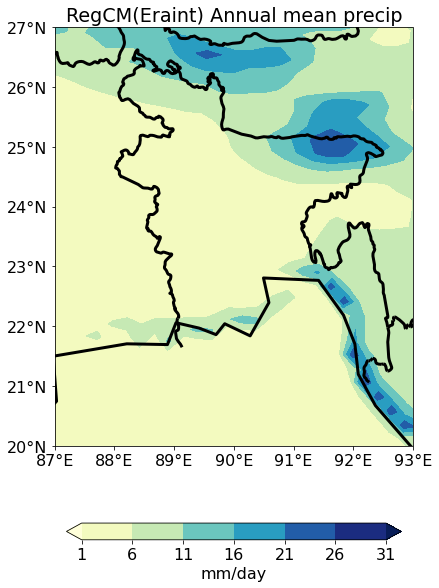

In [16]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(resolution='110m',linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
#ax.add_feature(cfeature.STATES)
#plt.title('RegCM(Eraint) Annual mean precip rate in mm/day',fontweight='bold', fontsize=15)

plt.title('RegCM(Eraint) Annual mean precip')




#to save and overwrite
strFile ="/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_eraintrin_annual_mean.png"

if os.path.isfile(strFile):
   os.remove(strFile)   # Opt.: os.system("rm "+strFile)
plt.savefig(strFile)





